In [2]:
%autosave 20
%matplotlib inline
import astropy
import numpy as np
import matplotlib.pyplot as plt

Autosaving every 20 seconds


In [4]:
import astropy.units as u
import astropy.constants as c

In [5]:
c.M_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.9884754153381438e+30 uncertainty=9.236140093538353e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2014'>

In [6]:
c.M_sun.cgs

<Quantity 1.98847542e+33 g>

In [7]:
type(c.M_sun)

astropy.constants.iau2015.IAU2015

In [11]:
type(c.M_sun.cgs.value), c.M_sun.cgs.value

(float, 1.9884754153381438e+33)

In [15]:
length = 1 * u.km
v = length / (2 * u.s)
type(v), v, type(u.km)

(astropy.units.quantity.Quantity,
 <Quantity 0.5 km / s>,
 astropy.units.core.PrefixUnit)

In [16]:
1 * u.cm / u.hour + u.km / u.s

TypeError: Unsupported operand type(s) for ufunc add: 'Quantity,CompositeUnit'

In [17]:
1e10 * u.cm / u.hour + 2 * u.km / u.s

<Quantity 1.072e+10 cm / h>

In [21]:
length = 1.5 * u.au
length.cgs, length.to(u.pc)

(<Quantity 2.24396806e+13 cm>, <Quantity 7.27220522e-06 pc>)

In [24]:
length_m = length.to_value(u.m)
type(length_m), length_m

(float, 224396806050.0)

In [28]:
v = np.sqrt(c.G * c.M_sun / (1 * u.au))
display(v)
display(v.to(u.km / u.s))

<Quantity 1.15200885e+10 m(3/2) / (AU(1/2) s)>

<Quantity 29.78469183 km / s>

In [30]:
period = 365.2422 * u.day
a = np.cbrt(period**2 * c.G * c.M_sun / (4 * np.pi**2))
a.to(u.um)

<Quantity 1.49593857e+17 um>

In [32]:
assert 1e9 * u.mpc == 1 * u.Mpc

In [39]:
x = (10 * u.g) ** (2/7 + 1/5)
x

<Quantity 3.05994969 g(17/35)>

In [40]:
x = (10 * u.g) ** np.pi
x

<Quantity 1385.45573137 g(3.141592653589793)>

In [37]:
assert 4/7 + 1/5 == 27 / 35

AssertionError: 

In [41]:
from fractions import Fraction as Fr

x = (10 * u.g) ** (Fr(2, 7) + Fr(1, 5))
x

<Quantity 3.05994969 g(17/35)>

In [43]:
Fr(2, 7) + Fr(1, 5)

Fraction(17, 35)

In [44]:
np.sin(90 * u.deg)

<Quantity 1.>

In [48]:
x = 1 / np.tan(1 * u.arcsec)
type(x)

astropy.units.quantity.Quantity

In [54]:
x.unit is u.dimensionless_unscaled

True

In [59]:
delta_m = 1 * u.mag
display(delta_m)
m_AB = 10 * u.ABmag
display(m_AB, m_AB.physical.to(u.Jansky))
m_AB2 = m_AB + delta_m
display(m_AB2, m_AB2.physical.to(u.Jansky))

<Quantity 1. mag>

<Magnitude 10. mag(AB)>

<Quantity 0.36307805 Jy>

<Magnitude 11. mag(AB)>

<Quantity 0.14454398 Jy>

In [63]:
m1 = u.Magnitude(10 * u.count / u.s)
m2 = u.Magnitude(1e5 * u.count / u.hour)
delta_m = (m2 - m1).decompose()
display(delta_m, delta_m.physical, 10**(-0.4 * delta_m.value))

<Magnitude -1.10924375 mag>

<Quantity 2.77777778>

2.7777777777777777

In [64]:
d_angle = 4 * u.deg
r = 100 * u.Mpc
kT = 8 * u.keV

radius = 2 * r * np.tan(0.5 * d_angle)
mass = 2.5 * kT * radius / (c.G * c.m_p)
mass.to(u.Msun)

<Quantity 3.11096639e+15 solMass>

In [82]:
from astropy.coordinates import SkyCoord
from astropy import coordinates as coord

# astropy.utils.iers.conf.auto_download = False

c1 = SkyCoord('05h35m17.3 -05d23m28s')
display(c1)
c2 = SkyCoord('J053517.3-052328', unit=(u.hour, u.deg))
display(c2)
c3 = SkyCoord(ra=1.23344, dec=-57.234, unit=u.deg)
display(c3)
c4 = SkyCoord(l=5*u.deg, b=-85*u.deg, frame='galactic')
display(c4)
display(c1.galactic, c4.icrs)

c_ = SkyCoord([c1, c2, c3, c4.icrs])
display(c_.galactic)
c0 = SkyCoord(ra=0*u.deg, dec=0*u.deg)

c0.separation(c_)

<SkyCoord (ICRS): (ra, dec) in deg
    (83.82208333, -5.39111111)>

<SkyCoord (ICRS): (ra, dec) in deg
    (83.82208333, -5.39111111)>

<SkyCoord (ICRS): (ra, dec) in deg
    (1.23344, -57.234)>

<SkyCoord (Galactic): (l, b) in deg
    (5., -85.)>

<SkyCoord (Galactic): (l, b) in deg
    (209.01374582, -19.38160147)>

<SkyCoord (ICRS): (ra, dec) in deg
    (7.78980914, -29.37890953)>

<SkyCoord (Galactic): (l, b) in deg
    [(209.01374582, -19.38160147), (209.01374582, -19.38160147),
     (315.0803033 , -58.78394381), (  5.        , -85.        )]>

<Angle [83.84951671, 83.84951671, 57.24254423, 30.30480989] deg>

In [92]:
import astropy.time

t = astropy.time.Time.now()
display(t)
loc = coord.EarthLocation.of_address(
    'ГАИШ'
)
loc

<Time object: scale='utc' format='datetime' value=2019-11-18 09:10:35.970048>

<EarthLocation (2856334.12495275, 2195136.24695857, 5245751.32562605) m>

In [93]:
loc.lon, loc.lat, loc.height

(<Longitude 37.54282602 deg>, <Latitude 55.7009485 deg>, <Quantity 0. m>)

In [96]:
alt_az_frame = coord.AltAz(
    obstime=astropy.time.Time.now(),
    location=coord.EarthLocation.of_site('subaru'),
)
c1.transform_to(alt_az_frame)

<SkyCoord (AltAz: obstime=2019-11-18 09:11:36.020661, location=(-5464468.1097167, -2493053.65044845, 2150943.60508102) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (115.2319918, 39.49625656)>

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: ()->() (4,3)->(4,newaxis) (4,3)->(4,newaxis) (241,3)->(241,newaxis) (241,)->(241,newaxis) ()->() and requested shape (3)

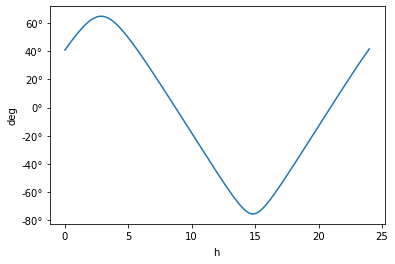

In [106]:
from astropy.visualization import quantity_support

loc = coord.EarthLocation.of_site('subaru')
dt = np.linspace(0, 24, 241) * u.hour
t_ = astropy.time.Time.now() + dt
frame = coord.AltAz(obstime=t_, location=loc)
altaz = c1.transform_to(frame)

with quantity_support():
    plt.plot(dt, altaz.alt.to(u.deg))

In [111]:
alt_az2d = c_.reshape(-1,1).transform_to(frame)
alt_az2d.shape

(4, 241)

In [113]:
a = np.arange(5)
b = np.arange(5, 10)
np.stack((a, b), axis=1)

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [116]:
list(map(list, zip(a, b)))

[[0, 5], [1, 6], [2, 7], [3, 8], [4, 9]]

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  800                                                  NAXIS2  =                  448                                                  EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

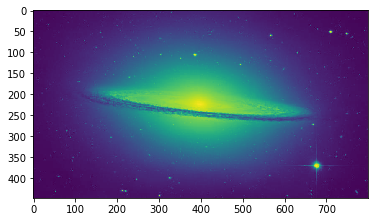

In [119]:
from astropy.io import fits

f = fits.open('sombrero.fits')
print(f[0].header)
data = f[0].data

plt.imshow(data[::-1])

In [122]:
with fits.open('sombrero.fits', memmap=False) as f:
    print(f[0].header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  800                                                  NAXIS2  =                  448                                                  EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     